University of Michigan - ROB 101 Computational Linear Algebra

# Unconstrained Optimization 

In an optimization problem, we would like to minimize (or maximize) an objective function over its input (called *design* or *decision variables*). In particular, here we work with an objective function of the type $f:\mathbb{R}^m \to \mathbb{R}$ and our decision variables are $m$-vectors, i.e., $x\in \mathbb{R}^m$.

Formally, to define a problem (also called a *program*) we write
\begin{equation*}
    \min_{x \in \mathbb{R}^m} f(x)
\end{equation*}
This means we want to *minimize* $f(x)$ where $x$ blongs to the set $\mathbb{R}^m$.

Of course we can also write 
\begin{equation*}
    \max_{x \in \mathbb{R}^m} f(x)
\end{equation*}
This means we want to *maximize* $f(x)$ where $x$ blongs to the set $\mathbb{R}^m$. Maximizing $f(x)$ is equivalent to minimizing $-f(x)$!

## Gradient Descent

We use a step size $\alpha > 0$ to control each update size.
1. Start with an initial guess $x_0$ ($k=0$).
2. Evaluate $\nabla f(x_k)$. If $\lVert \nabla f(x_k) \rVert = 0$, then the algorithm is converged.
3. Update the decision variable via $x_{k+1} = x_k - \alpha \nabla f(x_k)$.
4. Repeat (go back to 2) until convergence.

### Example 1

Consider the quadratic function $f(x) = x^T A x = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 2x_1^2 + 2x_2^2 - 2 x_1 x_2$. We want to find $x$ that minimizes $f(x)$.

\begin{equation*}
   x^* = \arg \min_{x \in \mathbb{R}^2} f(x)
\end{equation*}
Clearly, the answer is $\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$. In this case, we can plot the function.

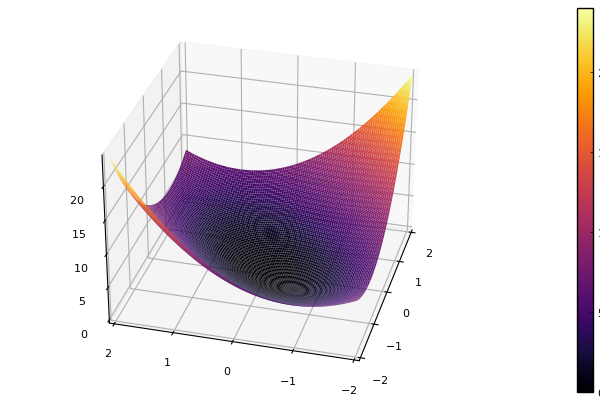

In [1]:
using Plots
pyplot()
x1 = LinRange(-2,2,101); x2 = LinRange(-2,2,101);
f(x1,x2) = 2 * x1^2 + 2 * x2^2 - 2 * x1 * x2;
plot(x1,x2,f,st=:surface,camera=(-75,30))

We can also plot the contours of the objective function. It is much easier to see the minimum at the origin using this plot. 

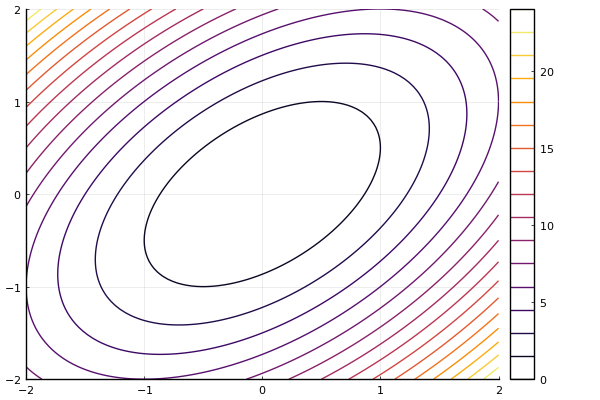

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [2]:
using Plots
pyplot()
#x1 = LinRange(-2,2,101); x2 = LinRange(-2,2,101);
f(x1,x2) = 2 * x1^2 + 2 * x2^2 - 2 * x1 * x2;
plot(x1,x2,f,st=:contour,camera=(-30,30))

Next, we implemnt a gradient descent alorithm to find the minimum. We can start from an initial guess such as $x_0=\begin{bmatrix} -1\\2 \end{bmatrix}$.

In [3]:
#using Pkg
#Pkg.add("ForwardDiff")
using LinearAlgebra
using ForwardDiff


function f1(x) # f(x) = x^T A x
    A = [2 -1; -1 2];
    return x' * A * x
end

f1 (generic function with 1 method)

In [4]:
x0 = [-1.; 2.]; # initial guess
α = 0.2; # step size
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 100; 
N = 1; # counter for iteration
x = x0; # root variable
while N < MAX_ITER
    g = ForwardDiff.gradient(f1, x); # evaluate gradient at current guess
    if norm(g) < delta
        println("Converged at iteration: N = ", N)
        break
    else
        x += -α * g; # x_{k+1} = x_k - step * grad
    end
    N += 1;
    # println("f(x): ", f1(x), "   norm(grad): ", norm(g), "   x: ", x)
end

println("f(x): ", f1(x), "   norm(grad): ", norm(ForwardDiff.gradient(f1, x)), "   x: ", x)

Converged at iteration: N = 43
f(x): 1.157910618394187e-19   norm(grad): 6.805617145841182e-10   x: [2.4061490169918684e-10, 2.4061490169918684e-10]


### Example 2

We now try to maximize a more complicated function. Consider $f(x) = (x_1^4 - x_2^4) \cdot \exp(-0.1 x_1^2 - 0.1 x_2^2)$.

\begin{equation*}
   x^* = \arg \max_{x \in \mathbb{R}^2} f(x)
\end{equation*}
We can plot the function and its contour. By investigating the plots we pick $x_0 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

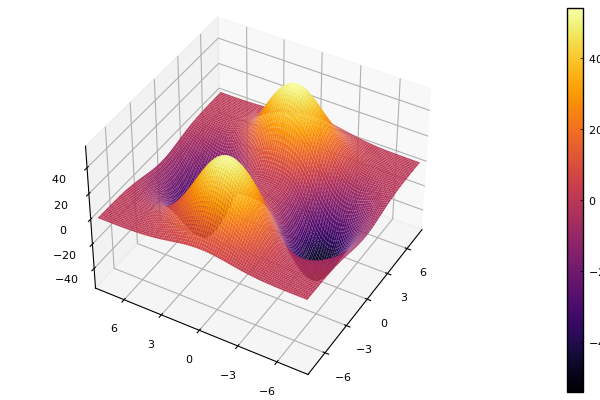

In [5]:
using Plots
pyplot()
x1 = LinRange(-8,8,101); x2 = LinRange(-8,8,101);
f(x1,x2) = (x1^4 - x2^4) * exp(0.1*(-x1^2-x2^2))
plot(x1,x2,f,st=:surface,camera=(-60,40))

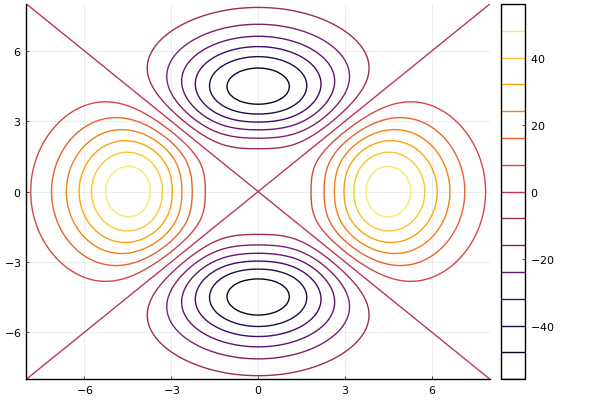

In [6]:
using Plots
pyplot()
x1 = LinRange(-8,8,101); x2 = LinRange(-8,8,101);
f(x1,x2) = (x1^4 - x2^4) * exp(0.1*(-x1^2-x2^2))
#plot(x1,x2,f,st=:surface,camera=(-30,60))
plot(x1,x2,f,st=:contour,camera=(-30,60))

In [7]:
function f2(x) # f(x) = (x1^2 - x2^4) exp(-0.1(x1^2+x2^2))
    return -(x[1]^4 - x[2]^4) * exp(0.1*(-x[1]^2-x[2]^2))
end

f2 (generic function with 1 method)

In [8]:
x0 = [1.; 0.]; # initial guess
α = 0.01; # step size
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 1000; 
N = 1; # counter for iteration
x = x0; # root variable
while N < MAX_ITER
    g = ForwardDiff.gradient(f2, x); # evaluate gradient at current guess
    if norm(g) < delta
        println("Converged at iteration: N = ", N)
        break
    else
        x += -α * g; # x_{k+1} = x_k - step * grad
    end
    N += 1;
    # println("f(x): ", f2(x), "   norm(grad): ", norm(g), "   x: ", x)
end

println("f(x): ", f2(x), "   norm(grad): ", norm(ForwardDiff.gradient(f2, x)), "   x: ", x)

Converged at iteration: N = 119
f(x): -54.134113294645076   norm(grad): 9.003429113363381e-10   x: [4.4721359549579995, 0.0]
